## Network Visualization

The goal of this study is to make a graphic presentation of the communication network based on avaiable emails in the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import networkx as nx

In [2]:
# pre-processed dataframe
df = pd.read_csv('out.csv', index_col='Message-ID', usecols=['Message-ID', 'To', 'From', 'Cc', 'Bcc', 'user', 'content'], low_memory=False)

In [3]:
df.head()

,Bcc,Cc,From,To,content,user
Message-ID,,,,,,
<18782981.1075855378110.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,tim.belden@enron.com,Here is our forecast\r\n\r\n,allen-p
<15464986.1075855378456.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,john.lavorato@enron.com,Traveling to have a business meeting takes the...,allen-p
<24216240.1075855687451.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,leah.arsdall@enron.com,test successful. way to go!!!,allen-p
<13505866.1075863688222.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,randall.gay@enron.com,"Randy,\r\n\r\n Can you send me a schedule of t...",allen-p
<30922949.1075863688243.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,greg.piper@enron.com,Let's shoot for Tuesday at 11:45.,allen-p


In [4]:
# Explore
print('Number of unique users:', df.user.nunique())
print('Number of unique From email addresses:', df.From.nunique())

Number of unique users: 150
Number of unique From email addresses: 20328


In [5]:
# Who has the most emails (sent and received combined)
user_emails_s = df.groupby('user')['user'].count().sort_values(ascending=False)
print(user_emails_s.head())

user
kaminski-v    28465
dasovich-j    28234
kean-s        25351
mann-k        23381
jones-t       19950
Name: user, dtype: int64


In [6]:
# Explore more
top_user = df[df['user'] == 'kaminski-v'].groupby('To')['To'].count().sort_values(ascending=False)
print(top_user.head(40))

To
vkaminski@aol.com                                     4870
vince.kaminski@enron.com                              2353
shirley.crenshaw@enron.com                            1421
vkamins@enron.com                                     1294
vince.j.kaminski@enron.com                            1065
j.kaminski@enron.com                                   761
stinson.gibner@enron.com                               448
steven.leppard@enron.com                               201
mike.roberts@enron.com                                 195
molly.magee@enron.com                                  172
vasant.shanbhogue@enron.com                            150
anita.dupont@enron.com                                 142
christie.patrick@enron.com                             129
kevin.moore@enron.com                                  121
zimin.lu@enron.com                                     120
vkamins@ect.enron.com                                  115
tanya.tamarchenko@enron.com                          

In [7]:
# Which email address sent the most emails?
email_sender_series = df.groupby(['From'])['From'].count().sort_values(ascending=False)
print(email_sender_series.head())

From
kay.mann@enron.com          16735
vince.kaminski@enron.com    14368
jeff.dasovich@enron.com     11411
pete.davis@enron.com         9149
chris.germany@enron.com      8801
Name: From, dtype: int64


### Interesting to know

- The top email user (kaminski-v) had at least 6 different email addresses from enron.com and at least two personal email addresses from aol.com and stanford.edu. Out of 28,465 emails that he sent or received, 4,870 emails were sent to his personal email at aol.com and 14,368 emails were sent by one of his enron emails: vince.kaminski@enron.com.

In [8]:
# groupby user and "From" email address
email_sender_series_2 = df.groupby(['user', 'From'])['From'].count().sort_values(ascending=False)
print(email_sender_series_2.head())

user          From                     
mann-k        kay.mann@enron.com           16658
kaminski-v    vince.kaminski@enron.com     14335
dasovich-j    jeff.dasovich@enron.com       9423
germany-c     chris.germany@enron.com       8663
shackleton-s  sara.shackleton@enron.com     8144
Name: From, dtype: int64


### So far

- There are some difference in the number of emails in the above tables. All of the emails sent by the users are not available in their own folder. Some emails are only avilable in the folders of recipient users. This means that the senders deleted those emails.
- Considering that some users used multiple email addresses at work and used email for personal matters as well, I decided to work with the "From" and "To" columns of the data for network visualization.

In [9]:
# In order to draw a network graph we need to pay attention to the To column.
# NaN in To column: float nan
df[df['To'].isnull()].head()

,Bcc,Cc,From,To,content,user
Message-ID,,,,,,
<15201149.1075855691021.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,NaN,No one will be home on 5/11/00 to meet DSL ins...,allen-p
<21975671.1075855665520.JavaMail.evans@thyme>,NaN,NaN,messenger@ecm.bloomberg.com,NaN,Here is today's copy of Bloomberg Power Lines....,allen-p
<9828978.1075855671241.JavaMail.evans@thyme>,NaN,NaN,phillip.allen@enron.com,NaN,No one will be home on 5/11/00 to meet DSL ins...,allen-p
<8236042.1075855673105.JavaMail.evans@thyme>,NaN,NaN,owner-strawbale@crest.org,NaN,<4DDE116DBCA1D3118B130080C840BAAD02CD53@ppims....,allen-p
<26959382.1075855693279.JavaMail.evans@thyme>,NaN,NaN,messenger@ecm.bloomberg.com,NaN,Here is today's copy of Bloomberg Power Lines....,allen-p


In [10]:
# Example of a message with To value of NaN
Tonan = df.loc['<18647535.1075855377111.JavaMail.evans@thyme>',:]
print(Tonan['To'], type(Tonan['To']))

nan <class 'float'>


In [11]:
print('Number of emails with missing To:', (df['To'].isnull()).sum())
print('Number of emails with missing To but existing Cc:', (df[df['To'].isnull()]['Cc'].notnull()).sum())
print('Number of emails with missing Cc but existing Bcc:', (df[df['Cc'].isnull()]['Bcc'].notnull()).sum())

Number of emails with missing To: 41197
Number of emails with missing To but existing Cc: 363
Number of emails with missing Cc but existing Bcc: 0


- There were 41197 emails with NaN in the 'To' column < 10% of the data.
- It is possible to retreive some information from Cc and Bcc columns for only 363 rows out of 41197 rows.
- I decided to remove the rows with missing To values for the network study.

In [12]:
# Removing rows with NaN in To column
df = df[df['To'].notnull()]
df.shape

(476204, 6)

In [13]:
# See if there were any NaN values in the 'From' column. There were none.
# When we convert float to string notnull would not work anymore. 
df['From'] = df['From'].apply(str) 
df[df['From'] == 'nan'].shape

(0, 6)

In [14]:
# Helper function to split multiple email addresses in the 'To' column
def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        # set:no repeat element, frozenset:immutable set
        addrs = frozenset(map(lambda x: x.strip(), addrs)) 
    else:
        addrs = None
    return addrs

In [15]:
# Split multiple email addresses in the To column. The class of the resulting elements will be frozenset.
df['To'] = df['To'].apply(str) 
df['To'] = df['To'].apply(split_email_addresses)

In [16]:
# Extract the first, 2nd, and 3rd recipients from the To column and add them to the dataframe
df['Recipient_1'] = df['To'].apply(lambda x: list(x)[0])
df['Recipient_2'] = df['To'].apply(lambda x: list(x)[1] if len(list(x))>1 else None)
df['Recipient_3'] = df['To'].apply(lambda x: list(x)[2] if len(list(x))>2 else None)
df['Recipient_4'] = df['To'].apply(lambda x: list(x)[3] if len(list(x))>3 else None)

In [17]:
print('Number of emails with more than 1 recipient:', df['Recipient_2'].notnull().sum())
print('Number of emails with more than 2 recipients:', df['Recipient_3'].notnull().sum())
print('Number of emails with more than 3 recipients:', df['Recipient_4'].notnull().sum())

Number of emails with more than 1 recipient: 136335
Number of emails with more than 2 recipients: 100017
Number of emails with more than 3 recipients: 84305


- By focusing on the first recipient we lose a lot of information in terms of the netwrok. However, with 476204 emails I have more information than I can present. A comprehensive approach would consider all the recipients in the network study. For a  simpler approach, I could have focused on emails with only one recipient (1:1 emails).  

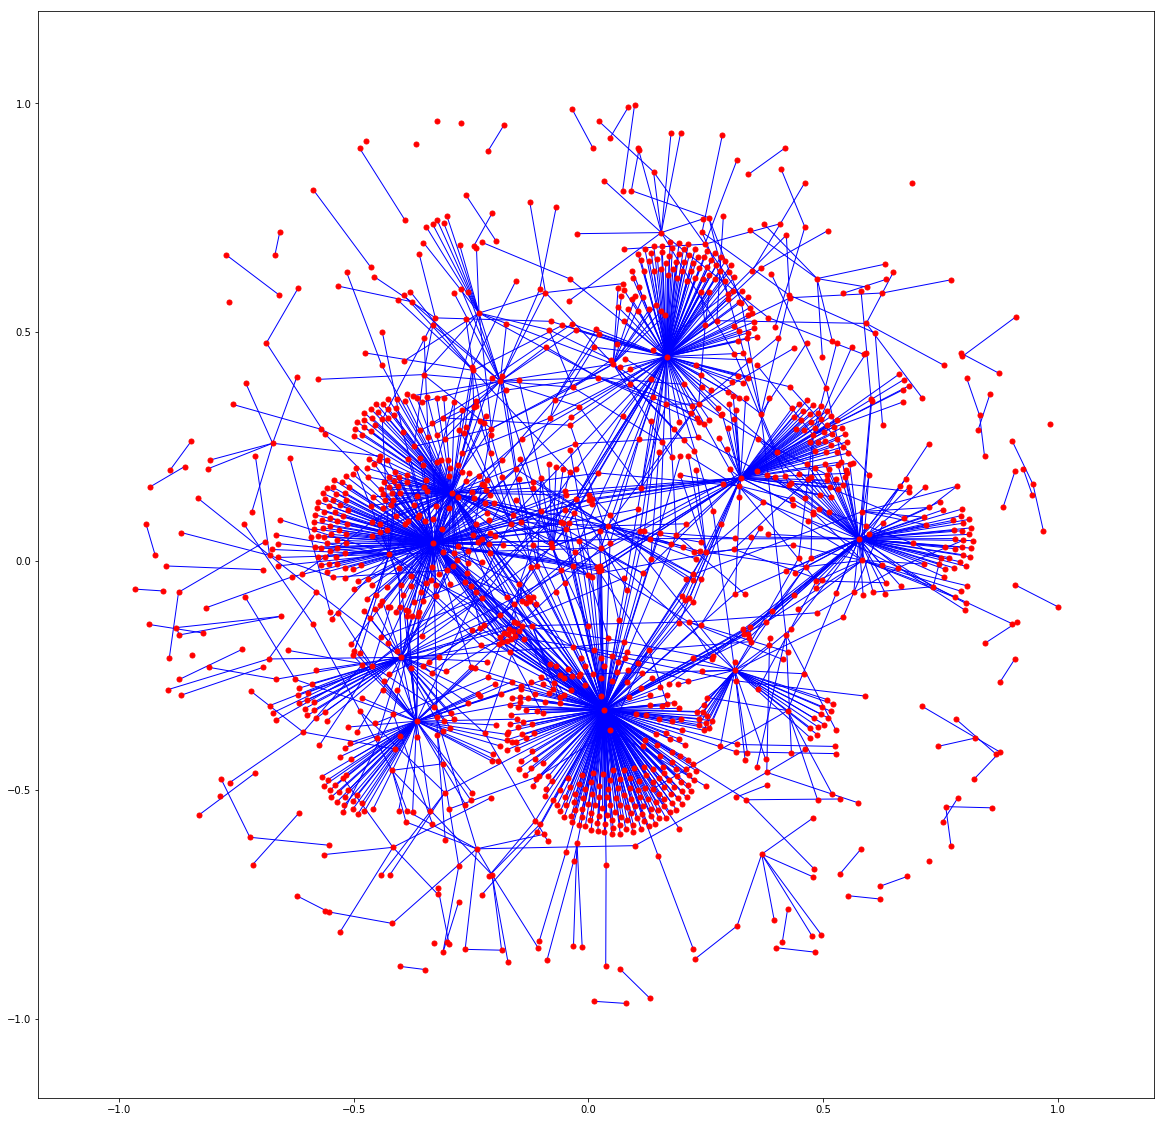

In [18]:
# Drawing a network graph for the first 10000 emails
df_reduced = df[['From', 'Recipient_1']][:10000]

plt.figure(figsize=(20,20))
G = nx.from_pandas_dataframe(df_reduced, 'From', 'Recipient_1', edge_attr=None) 
pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=False, edge_color='blue')
plt.show()

In [19]:
# In order to show some major clusters I will focus on the top email senders
top_ten_s = df.groupby('From')['From'].count().sort_values(ascending=False) [:10]
print(top_ten_s)
top_ten = list(top_ten_s.index) # list of an index object
print(list(top_ten))

From
kay.mann@enron.com               16102
vince.kaminski@enron.com         14329
jeff.dasovich@enron.com          11384
sara.shackleton@enron.com         8757
chris.germany@enron.com           8745
tana.jones@enron.com              8447
enron.announcements@enron.com     7745
pete.davis@enron.com              6995
steven.kean@enron.com             6220
kate.symes@enron.com              5432
Name: From, dtype: int64
['kay.mann@enron.com', 'vince.kaminski@enron.com', 'jeff.dasovich@enron.com', 'sara.shackleton@enron.com', 'chris.germany@enron.com', 'tana.jones@enron.com', 'enron.announcements@enron.com', 'pete.davis@enron.com', 'steven.kean@enron.com', 'kate.symes@enron.com']


In [20]:
# Emails dataframe sent by only the top five senders
df_top_five_senders = df[df.From.isin(top_ten[0:5])]
print(df_top_five_senders.shape)

(59317, 10)


In [21]:
# Emails dataframe sent by only the 6th to 10th senders
df_2nd_five_senders = df[df.From.isin(top_ten[5:10])]
print(df_2nd_five_senders.shape)

(34839, 10)


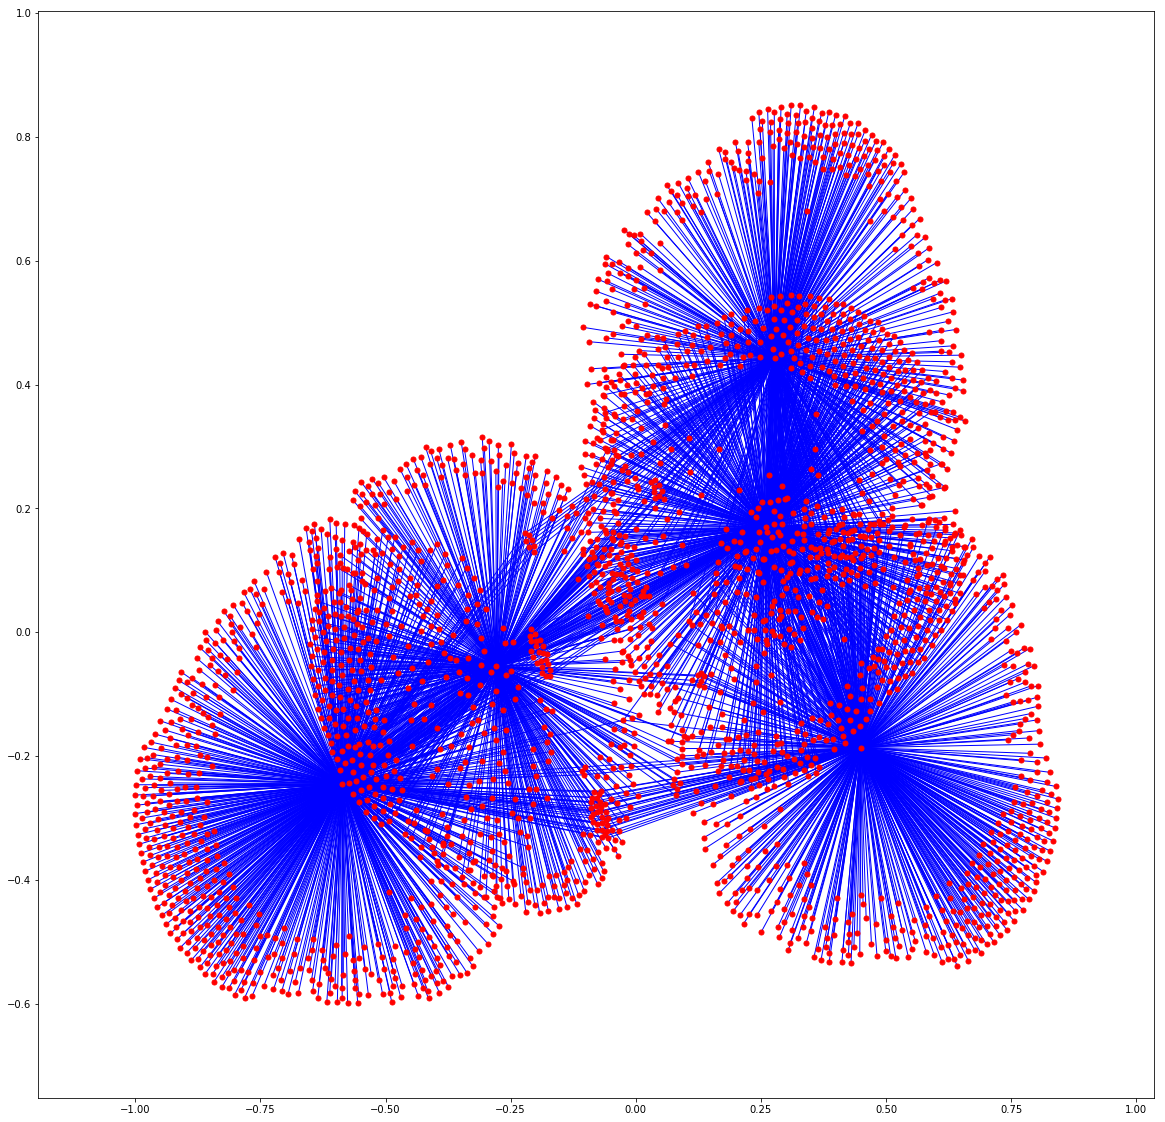

In [22]:
# Drawing a network graph for top 5 email senders
plt.figure(figsize=(20,20))
G = nx.from_pandas_dataframe(df_top_five_senders, 'From', 'Recipient_1', edge_attr=None)
pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=False, edge_color='blue')
plt.show()

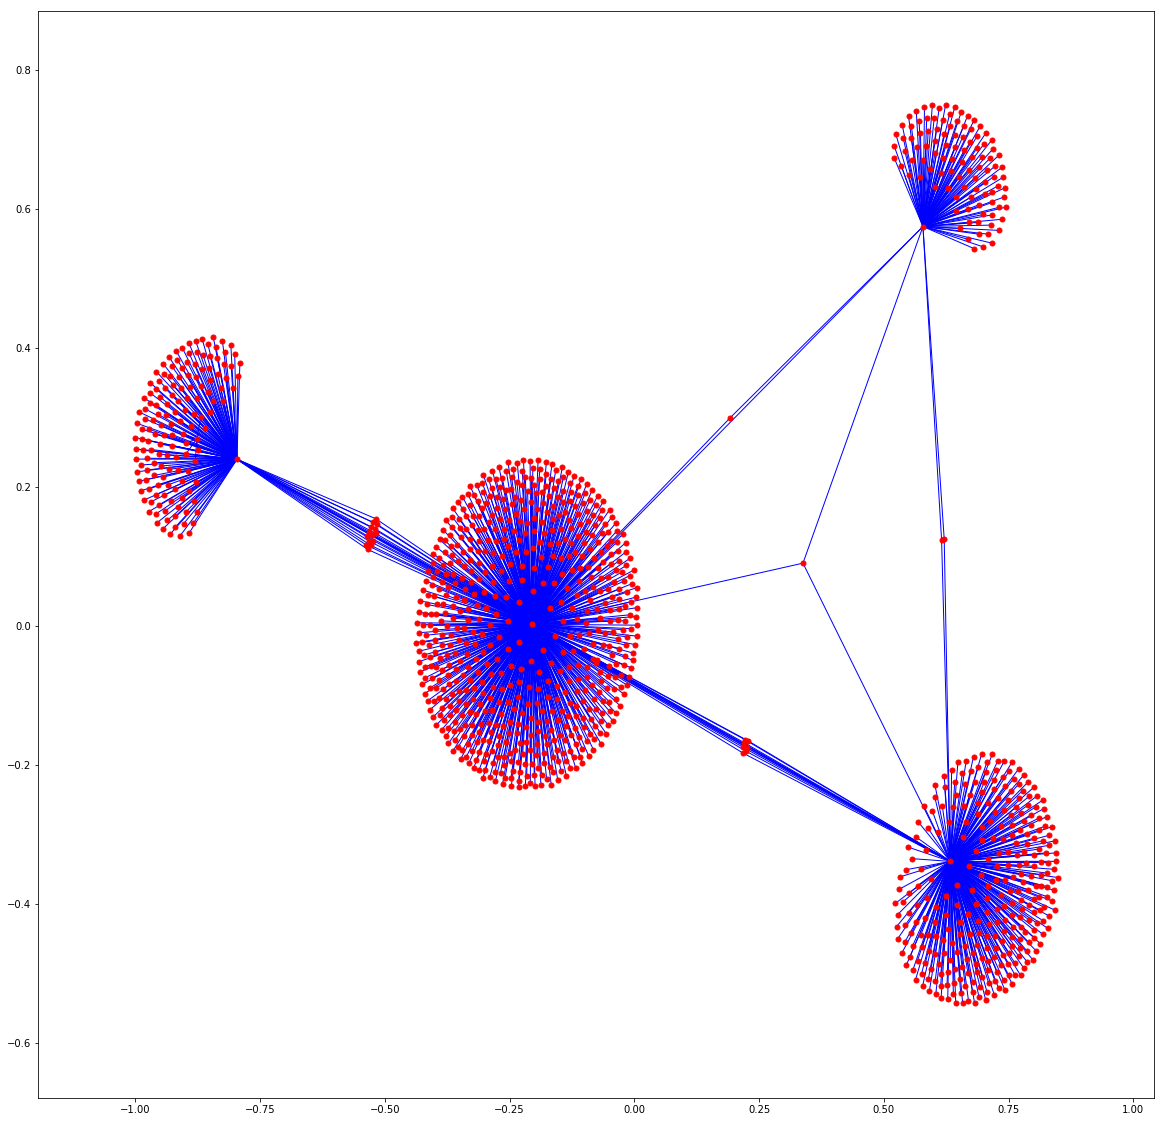

In [23]:
# Drawing a network graph for 6th to 10th top email senders
plt.figure(figsize=(20,20))
G = nx.from_pandas_dataframe(df_2nd_five_senders, 'From', 'Recipient_1', edge_attr=None)
pos = nx.spring_layout(G, k=.05)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=False, edge_color='blue')
plt.show()

- The top network should have had five clusters but it only has four. 
- It would be interesting to find out which email sender did not show up on the graph and why.

In [24]:
# detective work
df_2nd_five_senders.groupby('From')['Recipient_1'].nunique()

From
enron.announcements@enron.com    109
kate.symes@enron.com             165
pete.davis@enron.com               7
steven.kean@enron.com            313
tana.jones@enron.com             665
Name: Recipient_1, dtype: int64

In [25]:
# Emails dataframe sent by pete.davis@enron.com, the invisible node in the above graph
df_pete = df[df['From'] =='pete.davis@enron.com']
print(df_pete.shape)
print(df_pete['Recipient_1'].unique())

(6995, 10)
['monika.causholli@enron.com' 'pete.davis@enron.com'
 'portland.shift@enron.com' 'bill.iii@enron.com'
 'phillip.platter@enron.com' 'holden.salisbury@enron.com'
 'bill.williams@enron.com']


In [26]:
# pete.davis@enron.com sent 6995 emails and had 7 first recipient including himslef.
# Let's see how many of his emails had himself as the first recipient. 
(df_pete['Recipient_1'] == 'pete.davis@enron.com').sum()

6987

In [27]:
# Out of 6995 emails that Pete sent, he was the first recipeint of 6987 emails. 
# Lets check the number of emails he sent that have second recipients
(df_pete['Recipient_2'].notnull()).sum()

1

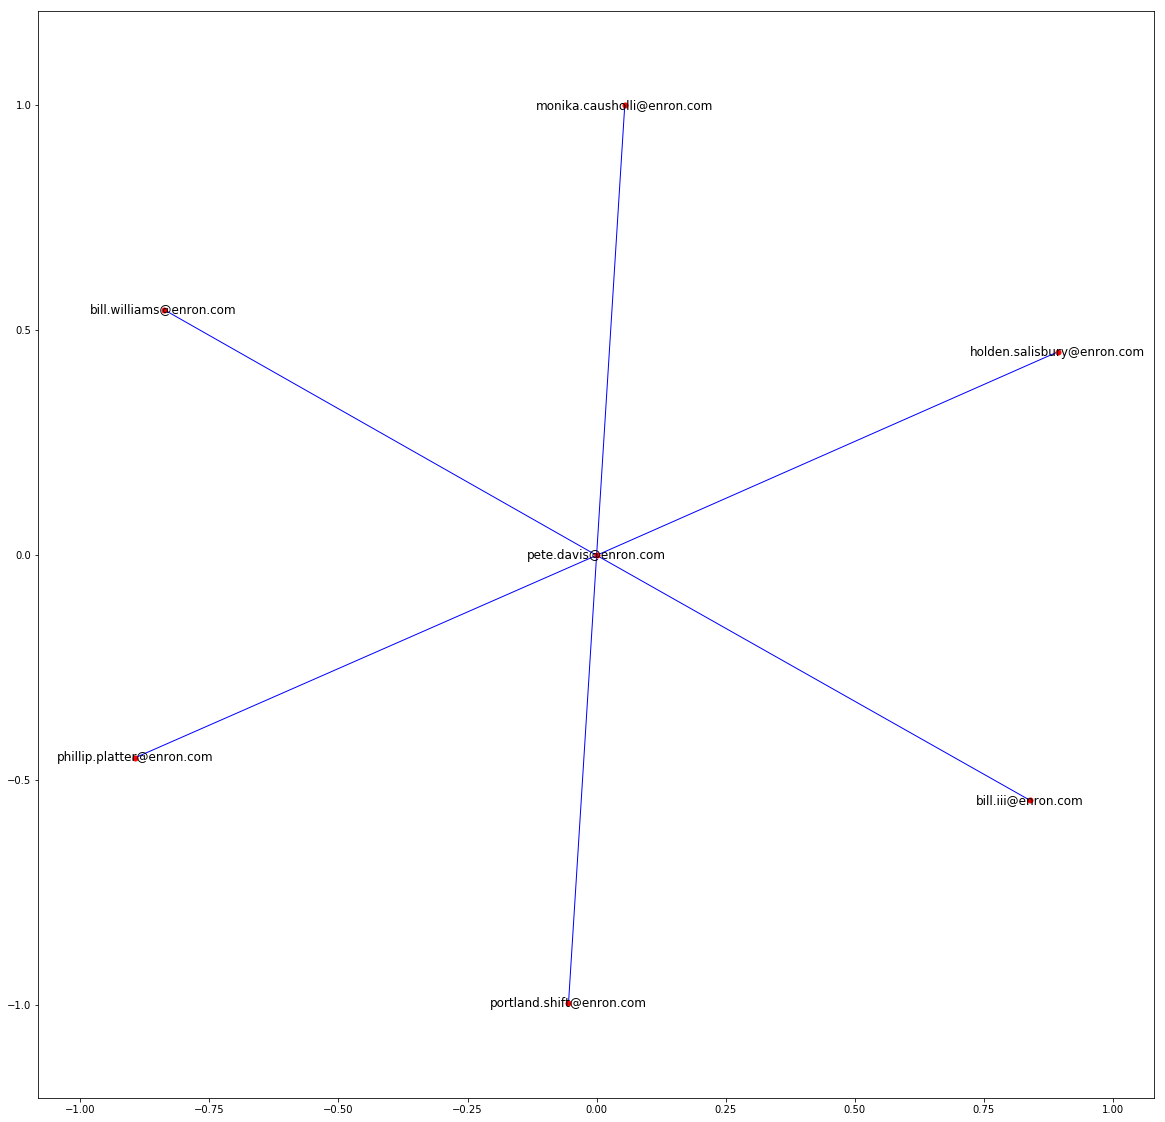

In [28]:
# pete.davis@enron.com network which was invisible in the last graph
plt.figure(figsize=(20,20))
G = nx.from_pandas_dataframe(df_pete, 'From', 'Recipient_1', edge_attr=None)
pos = nx.spring_layout(G, k=.4)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()

In [29]:
# We can have a look at one of his emails to himself:
df_pete['content'][4]

'\r\n\r\nStart Date: 10/18/01; HourAhead hour: 6;  No ancillary schedules awarded.  Variances detected.\r\nVariances detected in Energy Import/Export schedule. \r\n\r\n    LOG MESSAGES:\r\n\r\nPARSING FILE -->> O:\\Portland\\WestDesk\\California Scheduling\\ISO Final Schedules\\2001101806.txt\r\n\r\nError retrieving HourAhead price data - process continuing...\r\n---- Energy Import/Export Schedule ----\r\n$$$ Variance found in table tblINTCHG_IMPEXP.\r\n     Details: (Hour: 6 / Preferred:   0.00 / Final:   0.01)\r\n  TRANS_TYPE: FINAL\r\n  SC_ID: ECTRT\r\n  MKT_TYPE: 2\r\n  TRANS_DATE: 10/18/01\r\n  TIE_POINT: MALIN_5_RNDMTN\r\n  INTERCHG_ID: EPMI_CISO_A\r\n  ENGY_TYPE: WHEEL\r\n$$$ Variance found in table tblINTCHG_IMPEXP.\r\n     Details: (Hour: 6 / Preferred:   0.00 / Final:   0.01)\r\n  TRANS_TYPE: FINAL\r\n  SC_ID: ECTRT\r\n  MKT_TYPE: 2\r\n  TRANS_DATE: 10/18/01\r\n  TIE_POINT: PVERDE_5_DEVERS\r\n  INTERCHG_ID: EPMI_CISO_B\r\n  ENGY_TYPE: WHEEL\r\n$$$ Variance found in table tblI

In [30]:
# Considering the popularity of using Cc and Bcc 17 years ago we should look at those columns too
print('Number of pete.davis emails with Cc:', (df_pete['Cc'].notnull()).sum())
print('Number of unique values in his Cc lists:', df_pete['Cc'].nunique())
# print('His Cc lists', df_pete['Cc'].unique())

Number of pete.davis emails with Cc: 1453
Number of unique values in his Cc lists: 6


In [31]:
# Out of his 6995 emails 1453 emails had been Cced. Let's groupby them: 
df_pete.groupby(['To','Cc','Bcc'])['Cc','Bcc'].count()

Cc  \
To                     Cc                                                 Bcc                                                       
(pete.davis@enron.com) albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...    3   
                       albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...  846   
                       albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...    2   
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...   34   
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...  275   
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...  293   

                                                                                                                              Bcc  
To                     Cc                                                 Bcc                                                      
(pete.davis@enron.com) albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...    3  
                       albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...  846  
                       albert.meyers@enron.com, bill.williams@enron.co... albert.meyers@enron.com, bill.williams@enron.co...    2  
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...   34  
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...  275  
                       bert.meyers@enron.com, bill.williams@enron.com,... bert.meyers@enron.com, bill.williams@enron.com,...  293

In [32]:
# 6 distinct mailing lists were used in the Cc field.
print('Number of pete.davis emails with Bcc:', (df_pete['Bcc'].notnull()).sum())
print('Number of pete.davis emails with same Cc and Bcc:', (df_pete['Cc'] == df_pete['Bcc']).sum())

Number of pete.davis emails with Bcc: 1453
Number of pete.davis emails with same Cc and Bcc: 1453


- "pete.davis@enron.com" is the invisible node in the network graph. Out of the 6995 emails that Pete sent, he was the first recipeint of 6987 emails. Only 1453 emails were sent to other people in which the actual recipient email address was in the Cc field. He also repeated the Cc email addresses in the Bcc field as well.
- The specific style of this single user could have made us believe he was among the top ten email senders while he sent most of those emails to only himself. It appears that he used those emails to keep a log of his work as a lab notebook. Even when he sent emails to other people he put his email address in the To field and their email addresses in the Cc field. 
- Considering these types of complications, in order to do a thorough network study one would need to consider all the email addresses in the 'To', 'Cc', and 'Bcc' fields.